# Explore here

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#Realidar EDA


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


<Axes: >

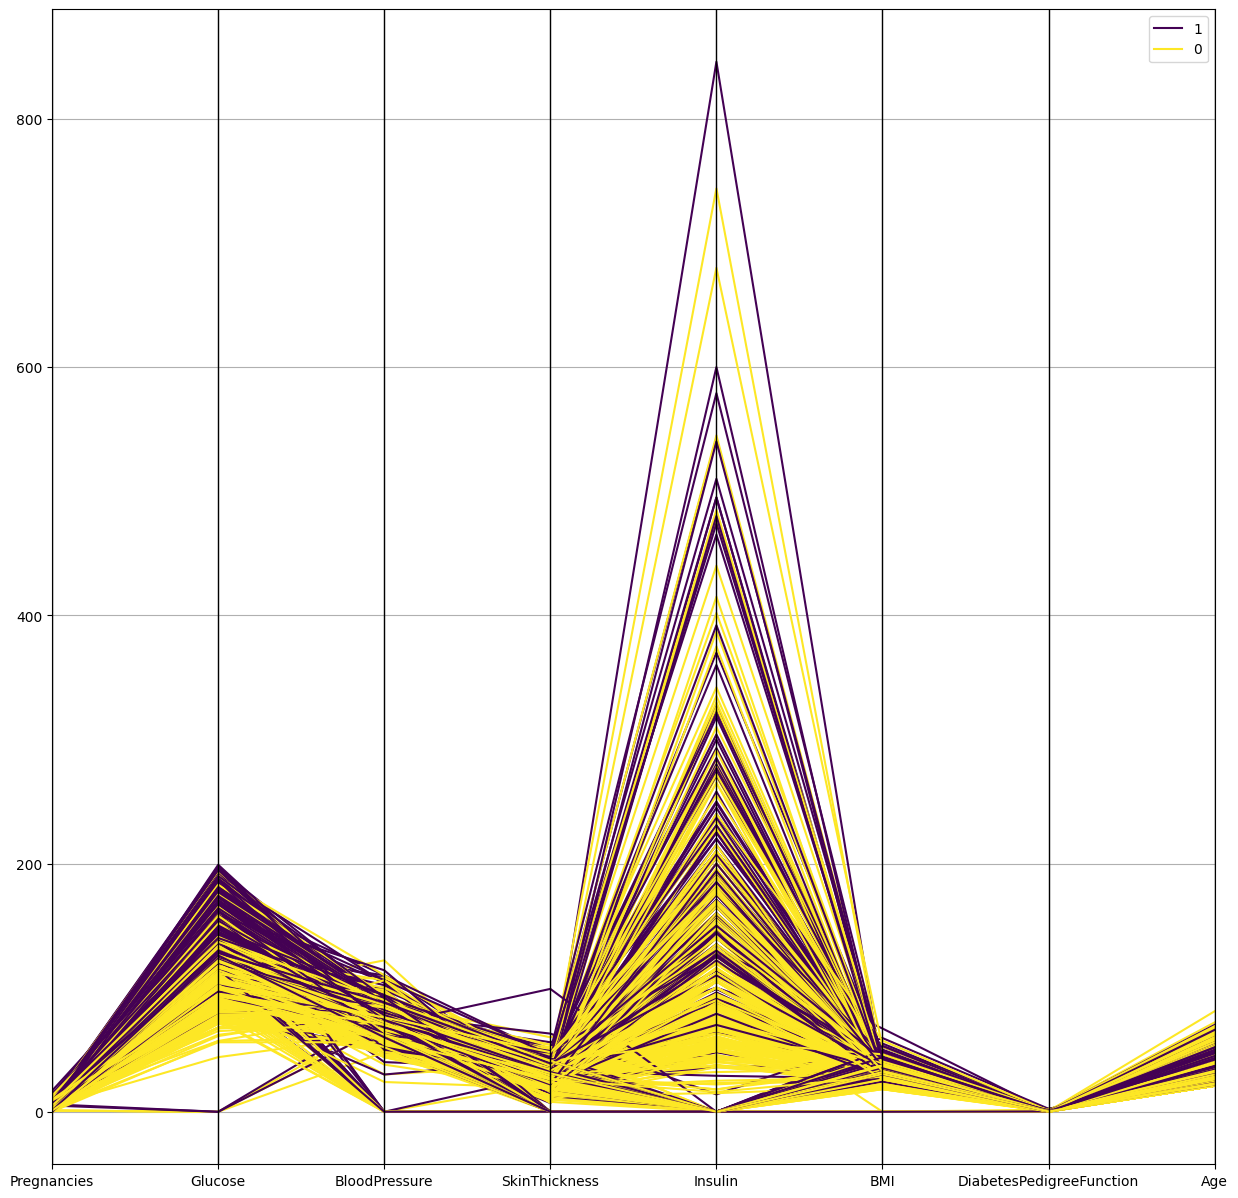

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

pd.plotting.parallel_coordinates(df,'Outcome',colormap='viridis')


In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

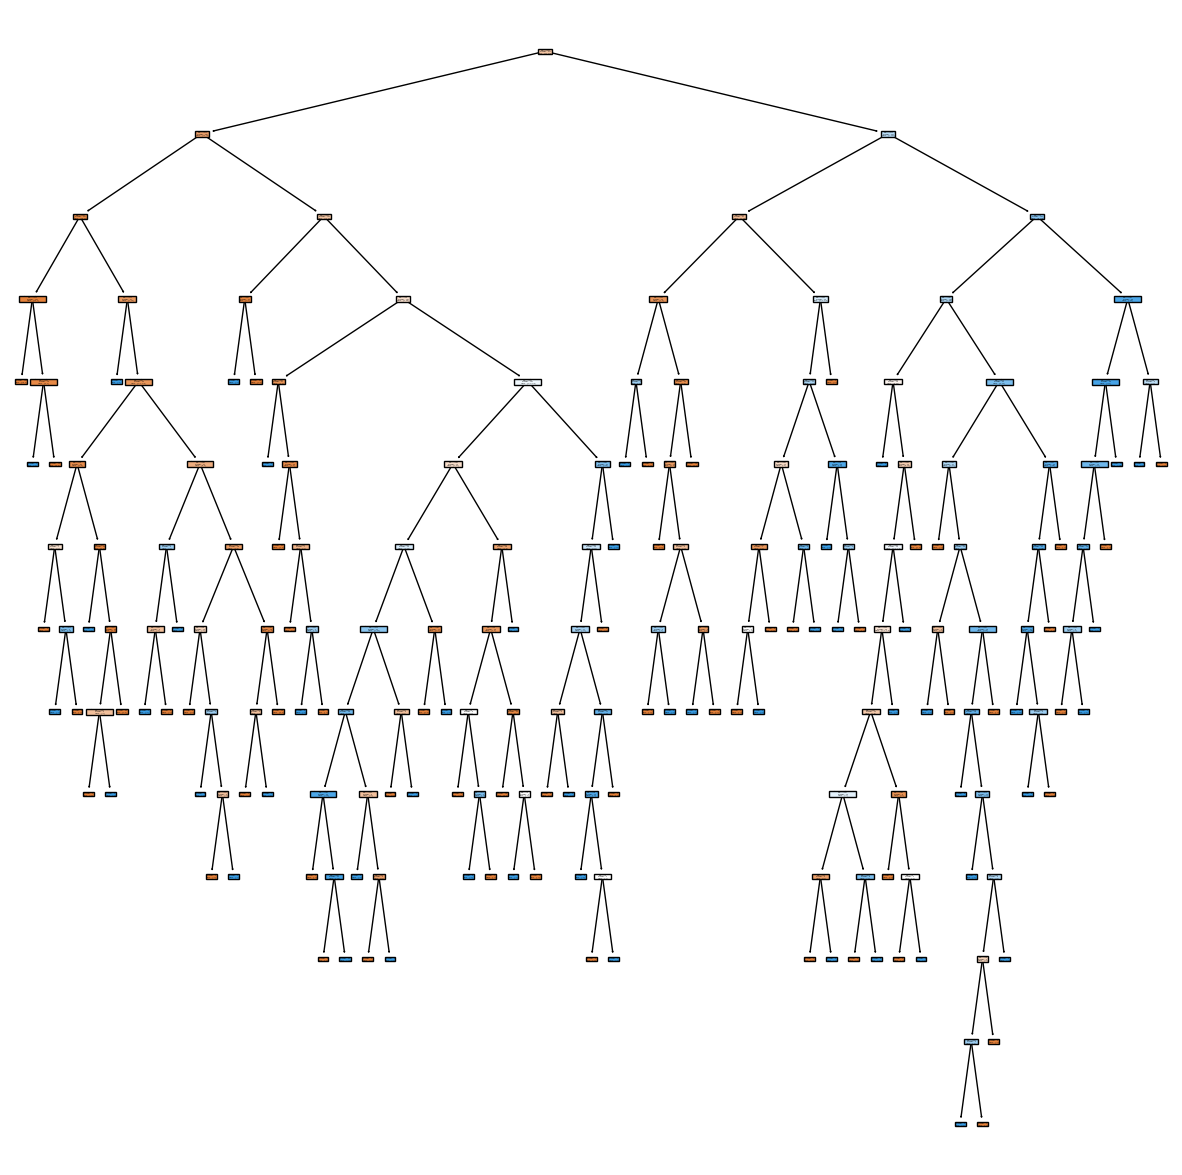

In [8]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=list(X_train.columns),filled=True)
plt.show()

In [9]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)


0.7467532467532467

In [10]:
from sklearn.model_selection import GridSearchCV

hyperparametros = {
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

grid = GridSearchCV(model,hyperparametros,scoring='accuracy',cv=5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [11]:
#Ajustamos la grilla

grid.fit(X_train,y_train)

print(f'Mejores parámetros: {grid.best_params_}')


Mejores parámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [12]:
#Crear el modelo

mejor_modelo = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=2,min_samples_split=2,random_state=42)
mejor_modelo.fit(X_train,y_train)
y_pred = mejor_modelo.predict(X_test)
accuracy_score(y_pred,y_test)


0.7857142857142857

In [21]:
from pickle import dump  

dump(mejor_modelo, open("../models/mejor_modelo_arbol_decision.sav","wb"))